# Exploring Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)

**AI-generated notebook — not fully verified!**

> ⚠️ This notebook was generated by AI and has not been fully reviewed or verified. Please check all code, outputs, and interpretations, and exercise caution when using these results in your own research.

---

## Overview

This notebook provides an introduction to **Dandiset 001333: Parkinson's Electrophysiological Signal Dataset (PESD)** ([view on DANDI archive](https://dandiarchive.org/dandiset/001333/0.250327.2220)). This dataset contains simulated electrophysiological signals from both healthy and parkinsonian subjects, focusing on the beta band (13–30 Hz) in the subthalamic nucleus (STN) as a biomarker of Parkinson’s Disease (PD). Each sample includes:
- **Beta Average Rectified Voltage (ARV):** Frequency domain.
- **Local Field Potential (LFP):** Time domain, from the STN.

The dataset includes a range of subjects, sessions, and recording types with signals and electrode metadata.

**Citation:**  
Biswas, Ananna (2025) Parkinson's Electrophysiological Signal Dataset (PESD) (Version 0.250327.2220) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001333/0.250327.2220

For dataset details, see: ["Preliminary Results of Neuromorphic Controller Design and a Parkinson's Disease Dataset Building for Closed-Loop Deep Brain Stimulation"](https://arxiv.org/abs/2407.17756)

---

## What this notebook covers

- Summarizes the dataset and shows how to programmatically explore it with Python.
- Demonstrates how to connect to the DANDI archive and list dataset assets (files).
- Shows how to load and explore a sample NWB file, displaying its structure and some sample data.
- Presents visualizations of electrophysiological signals.
- Provides code snippets, explanations, and references to external visualization tools.

> **Note:** Plots and interpretations here are for illustration only and should not be overinterpreted — see the raw data and documentation for rigorous analysis.

## Required Packages

- dandi
- pynwb
- remfile
- h5py
- numpy
- pandas
- matplotlib
- seaborn

*All these packages must already be installed in your environment.*

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

# Connect to the DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001333", "0.250327.2220")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}" if "url" in metadata else "")

# List the first 5 assets (files) in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Parkinson's Electrophysiological Signal Dataset (PESD)
Dandiset URL: https://dandiarchive.org/dandiset/001333/0.250327.2220

First 5 assets:
- sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb (ID: 5409700b-e080-44e6-a6db-1d3e8890cd6c)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-218_ecephys.nwb (ID: da77917e-655c-4eeb-a0a6-7529a8a35901)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-279_ecephys.nwb (ID: aa743a96-e79b-40b1-a0df-55ef3460e856)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-423_ecephys.nwb (ID: 068afe41-3b8e-402f-91d4-9f297df677a2)
- sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb (ID: b344c8b7-422f-46bb-b016-b47dc1e87c65)


## Choosing a NWB file to explore

We'll demonstrate data loading and analysis from:

**File:** `sub-healthy-simulated-beta/sub-healthy-simulated-beta_ses-162_ecephys.nwb`  
**Asset ID:** `b344c8b7-422f-46bb-b016-b47dc1e87c65`

**Direct download URL:**  
`https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/`

When loading this file below, we'll strictly use explicit code as recommended by DANDI, streaming the file remotely.

## Loading the NWB file

We access the remote NWB file using `remfile`, `h5py`, and `pynwb` (no full downloads required).

> *Note: For illustration, we'll introspect only a portion of the data to avoid excessive network usage.*

In [2]:
import pynwb
import h5py
import remfile

url = "https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Show some metadata about the session
print("NWB identifier:", nwb.identifier)
print("Session description:", nwb.session_description)
print("Session start time:", nwb.session_start_time)
print("Experimenter:", nwb.experimenter)
print("Institution:", nwb.institution)
print("Lab:", nwb.lab)
print("Subject ID:", nwb.subject.subject_id)
print("Subject species:", nwb.subject.species)
print("Related publications:", list(nwb.related_publications))

NWB identifier: 7a68ea11-865a-481a-a5fd-d91fe6def653
Session description: Parkinson's Electrophysiological Signal Dataset (PESD) Generated from Simulation
Session start time: 2025-03-27 16:53:27.990500-04:00
Experimenter: ('Ananna Biswas',)
Institution: Michigan Technological University
Lab: BrainX Lab
Subject ID: healthy-simulated-beta
Subject species: Homo sapiens
Related publications: ['https://arxiv.org/abs/2407.17756', 'DOI: 10.3389/fnins.2020.00166']


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB file structure summary

Below is a summary of the hierarchical structure of this NWB file (key portions only):

```
NWBFile
├─ experimenter
├─ session_description
├─ subject
│   ├─ subject_id
│   └─ species
├─ processing
│   └─ ecephys
│       └─ LFP
│           └─ electrical_series
│               └─ Beta_Band_Voltage
│                   ├─ data (shape: 1400,)
│                   ├─ timestamps (shape: 1400,)
│                   └─ electrodes (table)
├─ electrode_groups
│   ├─ shank0 ... shank3
│   └─ devices
└─ electrodes (table)
```

- **Beta_Band_Voltage:** 1400 samples, units: volts.
- **Electrodes table:** 12 channels, each with metadata (`location`, `group`, etc.)
- Devices (`NEURON_Simulator`) and electrode groups (shank0–shank3) describe simulated probe setup.

See [dataset documentation](https://arxiv.org/abs/2407.17756) for more details.

**Explore this NWB file visually on [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/b344c8b7-422f-46bb-b016-b47dc1e87c65/download/&dandisetId=001333&dandisetVersion=draft)** (external web link)

## Electrode metadata

Let's examine the electrodes table, which lists all the channels and metadata.

In [3]:
import pandas as pd

electrodes_df = nwb.electrodes.to_dataframe()
print(electrodes_df.head())
print(f"\nShape of electrodes table: {electrodes_df.shape}")
print("Electrode columns:", electrodes_df.columns.tolist())

                                            location  \
id                                                     
0   Simulated Cortico-basal-ganglia network of brain   
1   Simulated Cortico-basal-ganglia network of brain   
2   Simulated Cortico-basal-ganglia network of brain   
3   Simulated Cortico-basal-ganglia network of brain   
4   Simulated Cortico-basal-ganglia network of brain   

                                                group group_name         label  
id                                                                              
0   shank0 pynwb.ecephys.ElectrodeGroup at 0x12740...     shank0  shank0_elec0  
1   shank0 pynwb.ecephys.ElectrodeGroup at 0x12740...     shank0  shank0_elec1  
2   shank0 pynwb.ecephys.ElectrodeGroup at 0x12740...     shank0  shank0_elec2  
3   shank1 pynwb.ecephys.ElectrodeGroup at 0x12740...     shank1  shank1_elec0  
4   shank1 pynwb.ecephys.ElectrodeGroup at 0x12740...     shank1  shank1_elec1  

Shape of electrodes table: (12, 4)
Elec

## Exploring Beta_Band_Voltage data

We'll load and visualize a subset of the Beta_Band_Voltage signal from the LFP electrical series.

> **Note:** To avoid downloading everything, we select the first 300 samples (out of 1400).

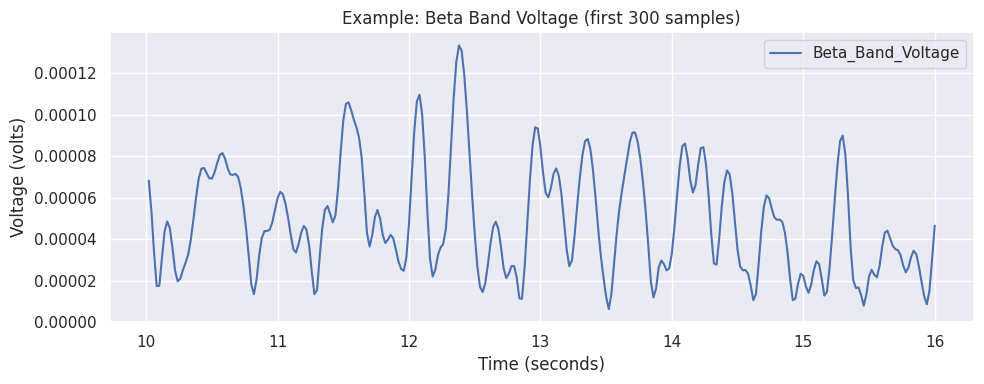

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

ecephys = nwb.processing['ecephys']
LFP = ecephys.data_interfaces['LFP']
beta_series = LFP.electrical_series['Beta_Band_Voltage']

# Load the first 300 samples to illustrate
voltage_data = beta_series.data[:300]
timestamps = beta_series.timestamps[:300]

plt.figure(figsize=(10, 4))
plt.plot(timestamps, voltage_data, label='Beta_Band_Voltage')
plt.xlabel(f"Time ({beta_series.timestamps_unit})")
plt.ylabel(f"Voltage ({beta_series.unit})")
plt.title("Example: Beta Band Voltage (first 300 samples)")
plt.legend()
plt.tight_layout()
plt.show()

## More about the Beta_Band_Voltage series

Let's inspect its associated electrodes and their labels:

In [5]:
# Get associated electrode table for the series
elec_table = beta_series.electrodes.table.to_dataframe()
print("Associated electrode info:\n", elec_table[['label', 'location', 'group_name']].head())

Associated electrode info:
            label                                          location group_name
id                                                                           
0   shank0_elec0  Simulated Cortico-basal-ganglia network of brain     shank0
1   shank0_elec1  Simulated Cortico-basal-ganglia network of brain     shank0
2   shank0_elec2  Simulated Cortico-basal-ganglia network of brain     shank0
3   shank1_elec0  Simulated Cortico-basal-ganglia network of brain     shank1
4   shank1_elec1  Simulated Cortico-basal-ganglia network of brain     shank1


## Summary and future directions

In this notebook, we demonstrated:
- How to connect to a Dandiset, list its contents, and programmatically access files.
- How to stream and introspect remote NWB files with PyNWB (using remfile & h5py).
- How to inspect available signals and electrode metadata, and plot a sample signal.

**Possible future directions:**
- Explore other files in the Dandiset (e.g., compare healthy vs. parkinsonian signals).
- Analyze ARV and LFP signals for specific sessions/subjects.
- Investigate frequency content and temporal patterns in the Beta band.
- Investigate differences between shank electrode groups.
- Integrate with external tools such as Neurosift for rich, interactive exploration.

---

For details, revisit the [Dandiset page](https://dandiarchive.org/dandiset/001333/0.250327.2220) and contributor article: https://arxiv.org/abs/2407.17756